# images and heatmaps

In [1]:
import matplotlib.pyplot as plt
import numpy as np

We are going to use a digital elevation model (DEM) from the [basemap tutorial](https://github.com/rveciana/BasemapTutorial/blob/master/code_examples/sample_files/dem.tiff) as the sample data set in this section (which is bunlded in the repository as an npy file) for the zone of Montserrat at 5m resolution.

In [2]:
im = np.load('data/dem.npy')

In [3]:
print(f"type: {type(im)}, shape: {im.shape}, dtype: {im.dtype}")

type: <class 'numpy.ndarray'>, shape: (324, 368), dtype: float32


To display 2D images the data needs to be spatially re-sampled to fit the screen and mapped from scaler values in the array to the colors we see on the screen.

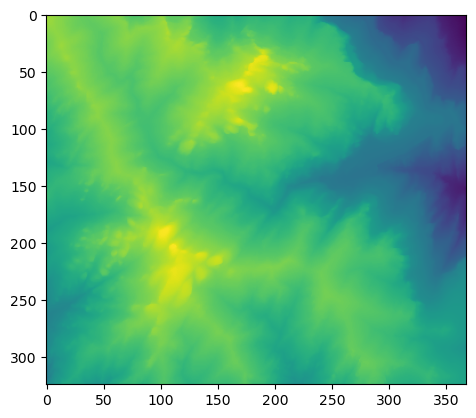

In [4]:
plt.imshow(im)

of course we should include a color bar to go with the image:

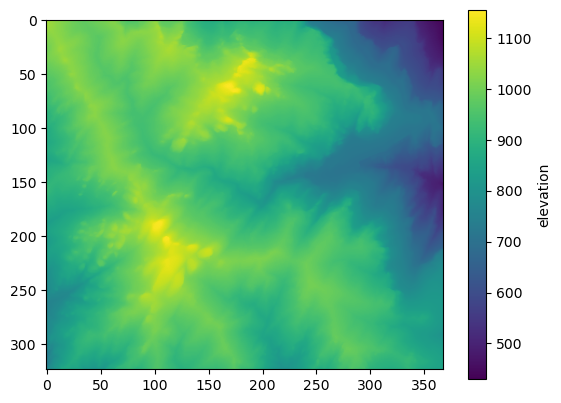

In [5]:
fig, ax = plt.subplots()
img = ax.imshow(im)
cbar = fig.colorbar(img)
cbar.set_label('elevation')

By default the colors are scaled over the full range of the input data, however this may not always be what you want (for example, if you are interested on a small contrast on top of a background or if there are extreme outliers).  To set the lower limit, use the `vmin` parameter to `imshow`  

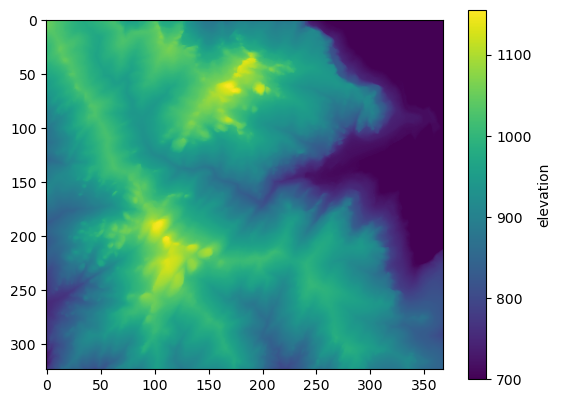

In [6]:
fig, ax = plt.subplots()
img = ax.imshow(im, vmin=700)
cbar = fig.colorbar(img)
cbar.set_label('elevation')

Note how the upper left which used to have texture is now colored unifromly and the lower limit of the color bar has been changed.

### Exercise

Use the `vmax` parameter to restrict color space from above.

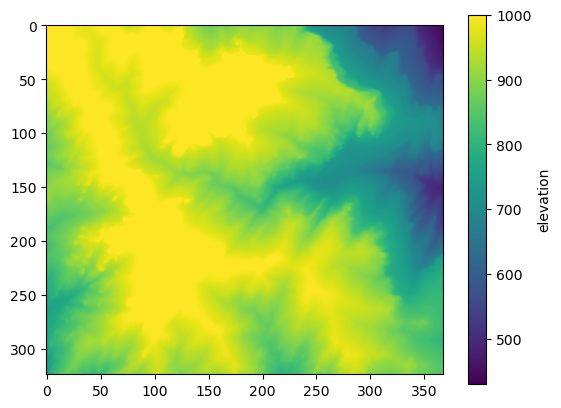

In [7]:
fig, ax = plt.subplots()
imag = ax.imshow(im, vmax=1000)
cbar = fig.colorbar(imag)
cbar.set_label("elevation")

## All the colors

While the default color map, [which replace 'jet' in mpl 2.0](https://bids.github.io/colormap/) has many good properties, but sometimes you just are not feeling the green (or have a [domain specfic reason for needing a different color map](https://matplotlib.org/cmocean)).  The color map can be controlled via the `cmap` parameter to `imshow`

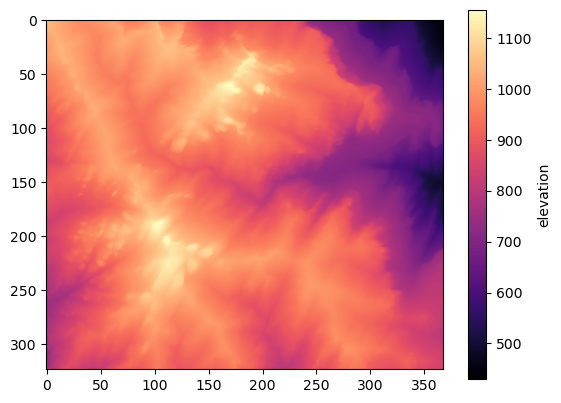

In [8]:
fig, ax = plt.subplots()
img = ax.imshow(im, cmap='magma')
cbar = fig.colorbar(img)
cbar.set_label('elevation')

### Exercise

Have a look at the [color maps available](https://matplotlib.org/tutorials/colors/colormaps.html) and try out some different colors.

## Follow the lines

A different way to visualize array data is via a contour plot.

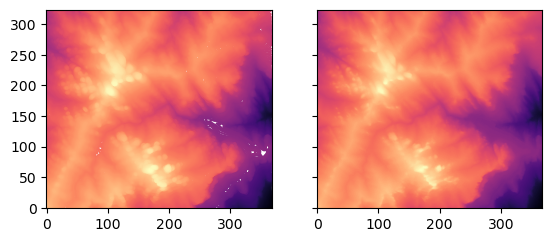

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.contour(im, cmap='magma', levels=300)
ax1.set_aspect('equal')
ax2.imshow(im, cmap='magma', origin='lower')      # put (0, 0) on the lower left to match contour

### Exercise

Try changing the `cmap` and `levels` parameters to `contour`

## Change the normalization

The conversion of your input data to the image on the screen is a multi-step process:

 - Your data is mapped to the range [0, 1] via a `Normalization`
 - The renormalized data is re-sampled to the correct number of pixels to fit on your output
 - The resampled data is mapped from [0, 1] -> RGB via the color map
 
The default normalization in linear, however there are cases where you need a more exotic normalization.

One such case is if your data covers several orders of magnitude.

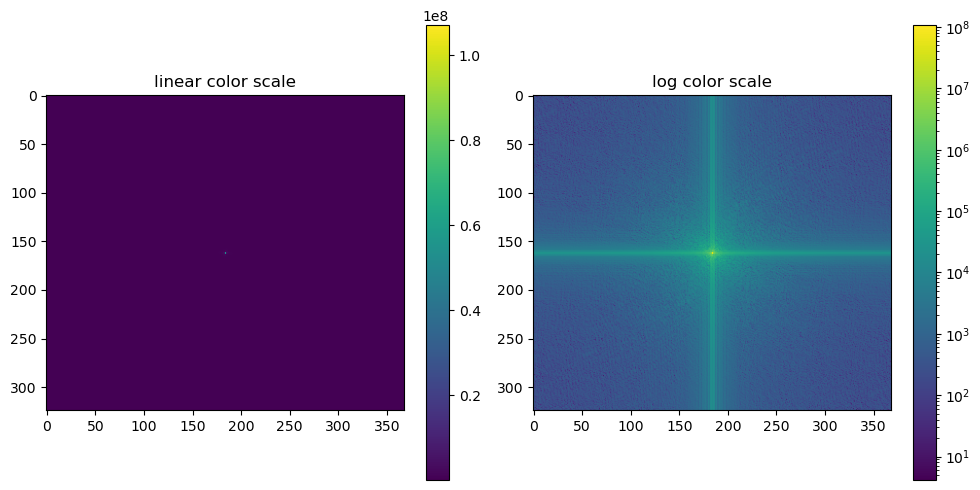

In [15]:
from matplotlib.colors import LogNorm

# take the 2D fft of our test image and re-order to put 0 frequency in the center
spike = np.abs(np.fft.fftshift(np.fft.fft2(im)))

fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(10, 5))

lin_im = ax1.imshow(spike)
_ = fig.colorbar(lin_im, ax=ax1)
_ = ax1.set_title('linear color scale')

log_im = ax2.imshow(spike, norm=LogNorm())
_ = fig.colorbar(log_im, ax=ax2)
_ = ax2.set_title('log color scale')

We can make use of a `BoundryNorm` to quantize the data (in in possibly non-uniform bins).

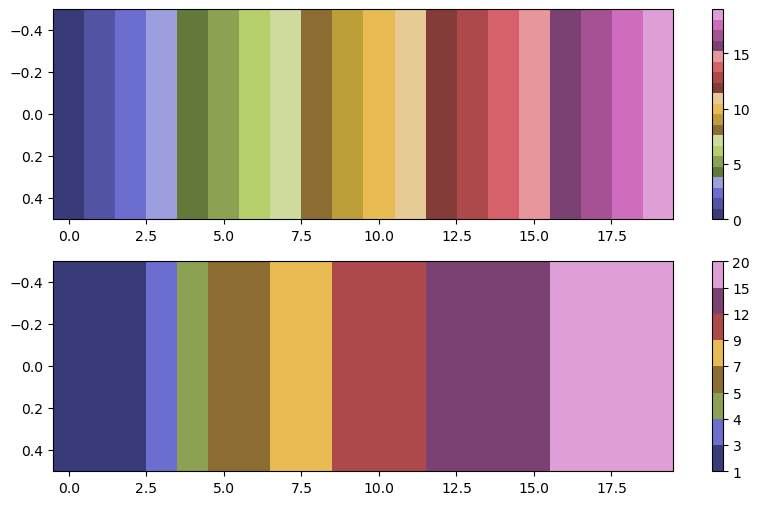

In [16]:
import matplotlib.colors as mcolors
import matplotlib.cm as mcm

cmap = mcm.tab20b
norm = mcolors.BoundaryNorm([1, 3, 4, 5, 7, 9, 12, 15, 20], cmap.N)

data = np.arange(20).reshape((1, 20))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

top = ax1.imshow(data, cmap=cmap, aspect='auto')
fig.colorbar(top, ax=ax1)
bottom = ax2.imshow(data, norm=norm, cmap=cmap, aspect='auto')
fig.colorbar(bottom, ax=ax2)